In [1]:
#Importing Required Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


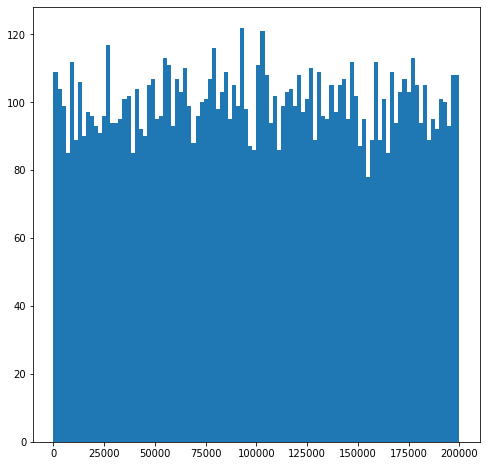

In [5]:
plt.figure(figsize=(8,8))
plt.hist(dataset.EstimatedSalary,bins=int(np.sqrt(len(list(dataset.EstimatedSalary)))))
plt.show()

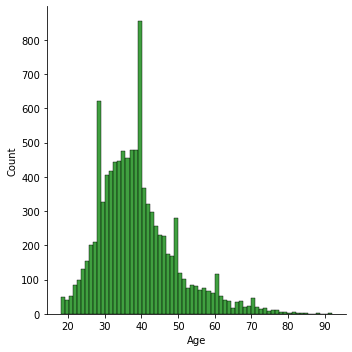

In [7]:

#Displot
sns.displot(dataset['Age'],color='green')

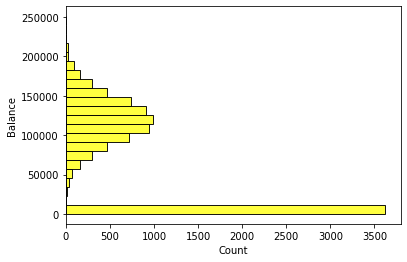

In [8]:
#Histogram
sns.histplot(y='Balance',data=dataset,color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


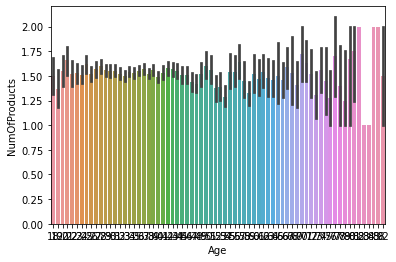

In [9]:
#Barplot 
sns.barplot(dataset['Age'],dataset['NumOfProducts'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


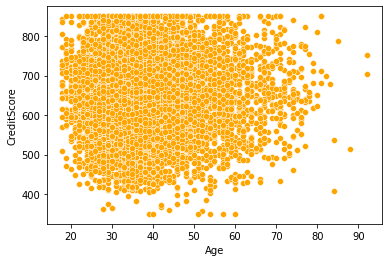

In [10]:
#Scatterplot 
sns.scatterplot(dataset['Age'],dataset['CreditScore'],color='orange')

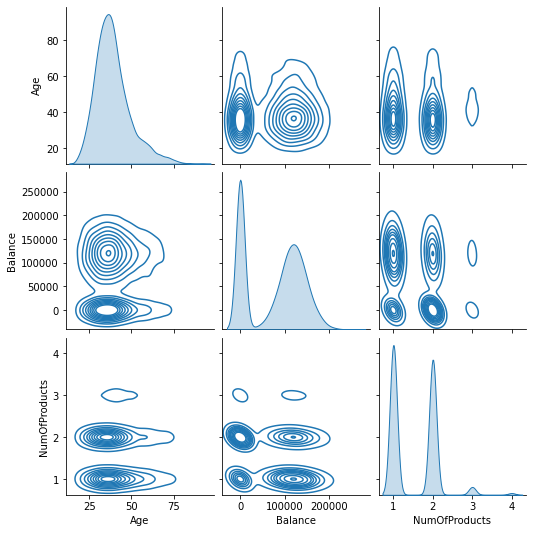

In [11]:
#Pair plot 
sns.pairplot(data=dataset[['Age','Balance','Surname','NumOfProducts']], kind='kde')

In [13]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
dataset.size

140000

In [15]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
outliers = dataset.quantile(q=(0.3,0.85))
outliers

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.30,3000.70,15641363.90,598.7,33.0,3.0,0.0000,1.0,1.0,0.0,60736.0790,0.0
0.85,8500.15,15777904.45,754.0,49.0,8.0,140895.0965,2.0,1.0,1.0,170322.3935,1.0


In [17]:
mod = dataset.drop(["Surname","CustomerId"],axis=1)
dataset  = pd.get_dummies(drop_first=True,data=mod)
dataset.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop("Exited",axis=1),dataset["Exited"], test_size=0.33, random_state=42)

In [20]:
X_train

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8371,8372,813,29,5,106059.40,1,0,0,187976.88,1,0,0
5027,5028,681,37,8,73179.34,2,1,1,25292.53,1,0,1
9234,9235,642,49,4,120688.61,1,1,0,24770.22,1,0,1
3944,3945,612,31,8,117989.76,1,1,1,54129.86,0,0,0
6862,6863,586,33,9,0.00,1,1,0,6975.02,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,5192,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,5391,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,861,667,43,8,190227.46,1,1,0,97508.04,0,0,1
